Installing necessary libraries

In [1]:
!pip install --upgrade --ignore-installed kaggle

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 153kB 7.9MB/s 
     |████████████████████████████████| 235kB 15.9MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 143kB 19.0MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 184kB 15.8MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=7d46cd7ad5b8353632cf5995ba63718f77bdb6560056d84698758a5c36641d00
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=dbc60e57c79ba77a09b620feef0d6a4253720a327dd8be6e7f231cef400088b9
  Stored in directory: /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f79

Uploading data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ameeraarif","key":"5a2c5d37596e760db6ffa8449f89a47a"}'}

In [3]:
!mkdir ~/.kaggle #created at root folder in colab
#copy
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:11<00:00, 31.3MB/s]
100% 346M/346M [00:11<00:00, 31.0MB/s]


In [4]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip # -q for quiet

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/


In [17]:
!unzip Testt.zip -d new_pred_data1

Streaming output truncated to the last 5000 lines.
  inflating: new_pred_data1/seg_pred/seg_pred/street/16635.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/15648.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/8704.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/13694.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/2206.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/4649.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/22297.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/9732.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/16177.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/5807.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/17271.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/12443.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/6211.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/street/2696.jpg  
  inflating: new_pred_data1/seg_pred/seg_pred/

Making my own VGG model from scratch

In [7]:
# necessary imports
import keras
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

import os
import cv2
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
 
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
 
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
 
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
 
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=6, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

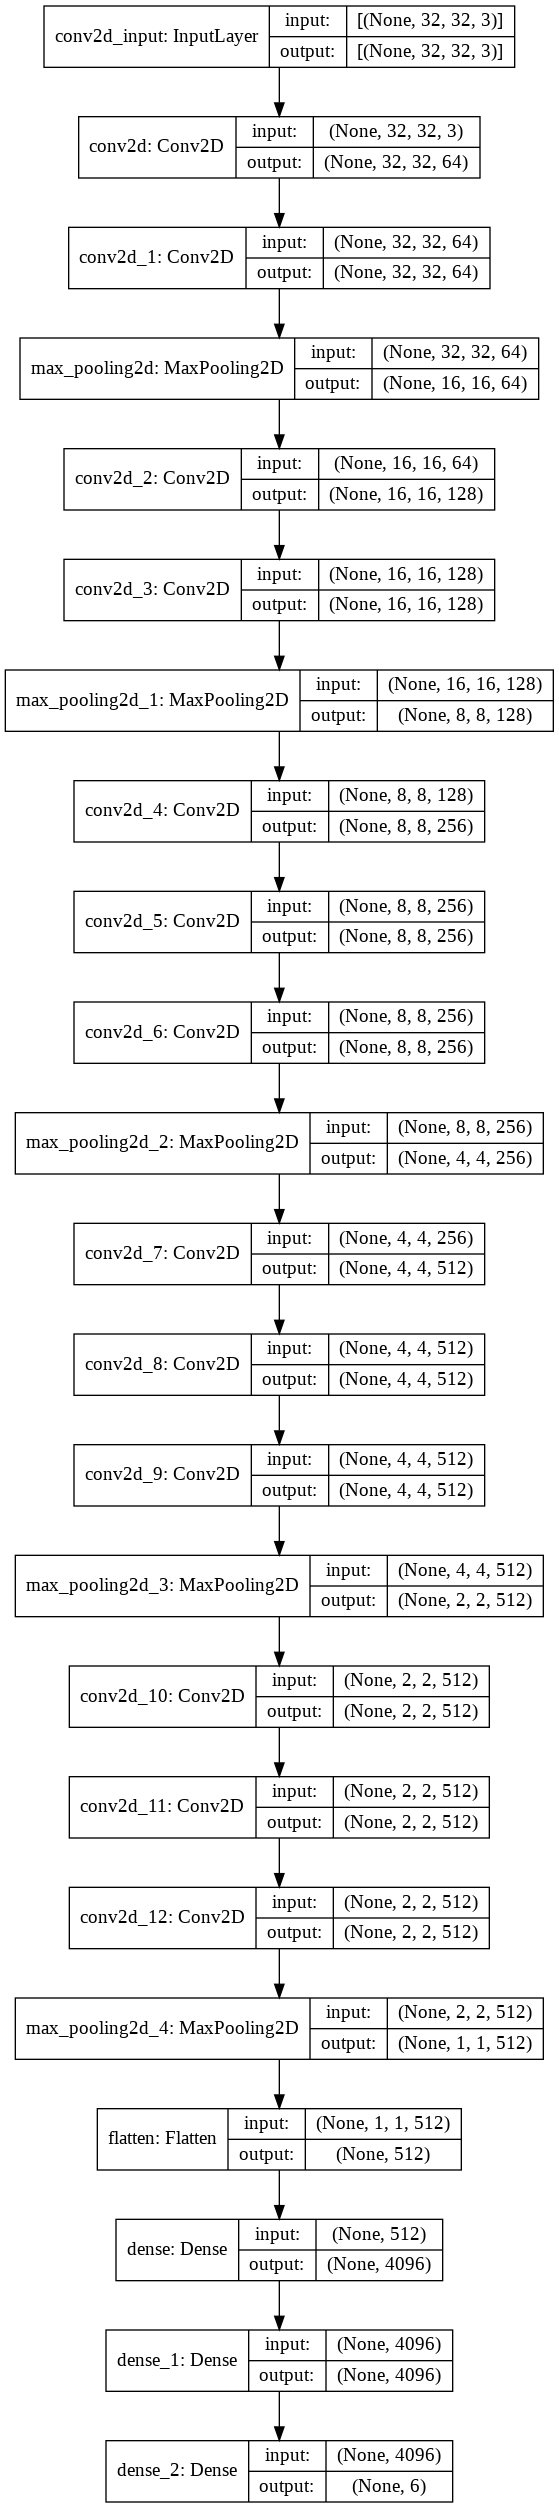

In [11]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file="self_made_model.png", show_shapes=True)

Loading data

In [12]:
# A function to load data from a given directory
def load_data(data_dir):
  data = []
  labels = []
  class_dirs = os.listdir(data_dir)
  
  for direc in class_dirs:
    class_dir = os.path.join(data_dir, direc)
    for imagepath in tqdm(list(paths.list_images(class_dir))):
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (32,32))  # incase images not of same size
      data.append(image)
      labels.append(direc)
  # normalizing and converting to numpy array format
  data = np.array(data, dtype='float')/255.0
  labels = np.array(labels)
  return data, labels

In [13]:
train_dir = "/content/seg_train/seg_train/"
test_dir = "/content/seg_test/seg_test/"

print('loading train images')
X_train, y_train = load_data(train_dir)
print('loading test images')
X_test, y_test = load_data(test_dir)


  5%|▌         | 117/2191 [00:00<00:01, 1164.35it/s]

loading train images


 38%|███▊      | 165/437 [00:00<00:00, 1644.86it/s]

loading test images


100%|██████████| 501/501 [00:00<00:00, 1652.84it/s]


In [18]:
pred_dir = "/content/new_pred_data1/seg_pred/seg_pred/"
print('loading pred images')
X_pred, y_pred = load_data(pred_dir)


 14%|█▍        | 162/1144 [00:00<00:00, 1616.81it/s]

loading pred images


100%|██████████| 1236/1236 [00:00<00:00, 1676.00it/s]


In [29]:
print(X_train.shape)
print(X_test.shape)
print(X_pred.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(7301, 32, 32, 3)
(14034,)
(3000,)
(7301,)


In [14]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


In [19]:
y_pred= lb.fit_transform(y_pred)

Training with different hyperparameters

In [18]:
#TRYING DIFFERENT PARAMETERS (lr=0.001 adam batch_size=128)

from keras.optimizers import Adam
import datetime
now = datetime.datetime.now
t = now()

adam = Adam(lr=0.001, decay=1e-7)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])
H3 = model.fit(X_train, y_train, batch_size=128,
              epochs=30, 
              validation_data=(X_test, y_test))
print('Training time: %s' % (now() - t))
best_scoreH3 = max(H3.history['accuracy'])
print(best_scoreH3)

Epoch 1/30
110/110 [==============================] - 9s 69ms/step - loss: 2.0759 - accuracy: 0.3880 - val_loss: 0.8827 - val_accuracy: 0.6340
Epoch 2/30
110/110 [==============================] - 7s 62ms/step - loss: 0.7513 - accuracy: 0.7282 - val_loss: 0.7175 - val_accuracy: 0.7423
Epoch 3/30
110/110 [==============================] - 7s 63ms/step - loss: 0.5814 - accuracy: 0.8135 - val_loss: 0.5791 - val_accuracy: 0.8080
Epoch 4/30
110/110 [==============================] - 7s 63ms/step - loss: 0.4319 - accuracy: 0.8583 - val_loss: 0.5742 - val_accuracy: 0.8153
Epoch 5/30
110/110 [==============================] - 7s 64ms/step - loss: 0.3925 - accuracy: 0.8772 - val_loss: 0.5305 - val_accuracy: 0.8250
Epoch 6/30
110/110 [==============================] - 7s 63ms/step - loss: 0.3156 - accuracy: 0.8991 - val_loss: 0.5781 - val_accuracy: 0.8143
Epoch 7/30
110/110 [==============================] - 7s 63ms/step - loss: 0.2894 - accuracy: 0.9080 - val_loss: 0.5711 - val_accuracy: 0.8183

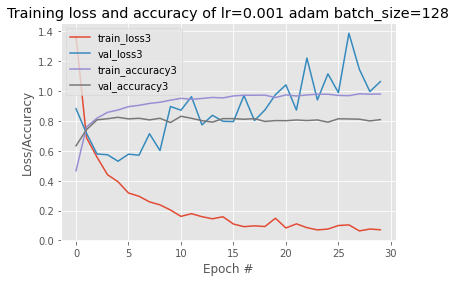

In [19]:

import matplotlib.pyplot as plt
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()

plt.plot(N, H3.history['loss'], label='train_loss3')
plt.plot(N, H3.history['val_loss'], label='val_loss3')
plt.plot(N, H3.history['accuracy'], label='train_accuracy3')
plt.plot(N, H3.history['val_accuracy'], label='val_accuracy3')


plt.title('Training loss and accuracy of lr=0.001 adam batch_size=128')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [20]:
#TRYING DIFFERENT PARAMETERS (lr=0.001 rmsprop batch_size=128)

from keras.optimizers import RMSprop
import datetime
now = datetime.datetime.now
t = now()

rmsprop = RMSprop(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', 
              optimizer=rmsprop,
              metrics=['accuracy'])
H5 = model.fit(X_train, y_train, batch_size=128,
              epochs=30, 
              validation_data=(X_test, y_test))
print('Training time: %s' % (now() - t))
best_scoreH5 = max(H5.history['accuracy'])
print(best_scoreH5)

Epoch 1/30
110/110 [==============================] - 8s 65ms/step - loss: 1.8641 - accuracy: 0.3386 - val_loss: 1.5706 - val_accuracy: 0.3460
Epoch 2/30
110/110 [==============================] - 7s 62ms/step - loss: 1.8566 - accuracy: 0.2499 - val_loss: 3.1478 - val_accuracy: 0.1670
Epoch 3/30
110/110 [==============================] - 7s 62ms/step - loss: 2.1110 - accuracy: 0.1925 - val_loss: 1.8296 - val_accuracy: 0.1353
Epoch 4/30
110/110 [==============================] - 7s 61ms/step - loss: 2.1794 - accuracy: 0.1969 - val_loss: 1.8516 - val_accuracy: 0.1117
Epoch 5/30
110/110 [==============================] - 7s 61ms/step - loss: 2.1106 - accuracy: 0.2078 - val_loss: 2.6754 - val_accuracy: 0.2370
Epoch 6/30
110/110 [==============================] - 7s 62ms/step - loss: 4.2236 - accuracy: 0.1905 - val_loss: 16.6051 - val_accuracy: 0.1753
Epoch 7/30
110/110 [==============================] - 7s 62ms/step - loss: 22.4191 - accuracy: 0.1678 - val_loss: 15.4060 - val_accuracy: 0.1

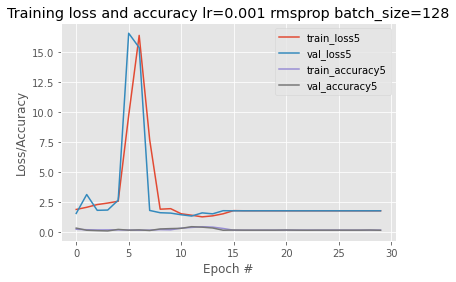

In [21]:

import matplotlib.pyplot as plt
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()

plt.plot(N, H5.history['loss'], label='train_loss5')
plt.plot(N, H5.history['val_loss'], label='val_loss5')
plt.plot(N, H5.history['accuracy'], label='train_accuracy5')
plt.plot(N, H5.history['val_accuracy'], label='val_accuracy5')


plt.title('Training loss and accuracy lr=0.001 rmsprop batch_size=128')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [22]:

from keras.optimizers import SGD
import datetime
now = datetime.datetime.now
t = now()

epochs = 30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
H4 = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test),verbose=2)

print('Training time: %s' % (now() - t))
best_scoreH4 = max(H4.history['accuracy'])
print(best_scoreH4)

Epoch 1/30
220/220 - 9s - loss: 0.5089 - accuracy: 0.1784 - val_loss: 0.4524 - val_accuracy: 0.1750
Epoch 2/30
220/220 - 8s - loss: 0.4511 - accuracy: 0.1790 - val_loss: 0.4504 - val_accuracy: 0.1750
Epoch 3/30
220/220 - 8s - loss: 0.4505 - accuracy: 0.1790 - val_loss: 0.4503 - val_accuracy: 0.1750
Epoch 4/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4502 - val_accuracy: 0.1750
Epoch 5/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4503 - val_accuracy: 0.1750
Epoch 6/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4503 - val_accuracy: 0.1750
Epoch 7/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4503 - val_accuracy: 0.1750
Epoch 8/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4502 - val_accuracy: 0.1750
Epoch 9/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4502 - val_accuracy: 0.1750
Epoch 10/30
220/220 - 8s - loss: 0.4504 - accuracy: 0.1790 - val_loss: 0.4502 - val_accuracy: 0.1750

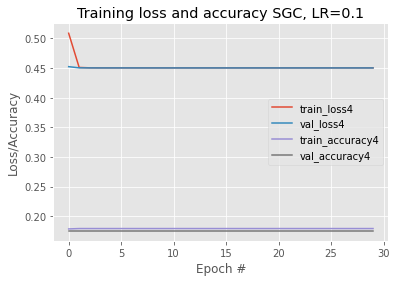

In [23]:

import matplotlib.pyplot as plt
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()

plt.plot(N, H4.history['loss'], label='train_loss4')
plt.plot(N, H4.history['val_loss'], label='val_loss4')
plt.plot(N, H4.history['accuracy'], label='train_accuracy4')
plt.plot(N, H4.history['val_accuracy'], label='val_accuracy4')


plt.title('Training loss and accuracy SGC, LR=0.1')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

**Best results**
After training with different hyperparameters, I got best results from SGD optimizer with lr=0.01, momentum=0.8

In [31]:
#TRYING DIFFERENT PARAMETERS (lr=0.01 SGD momentum 0.8)
from keras.optimizers import SGD
import datetime
now = datetime.datetime.now
t = now()

sgd = SGD(lr=0.01, decay=1e-7, momentum=.8)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])
H1 = model.fit(X_train, y_train, batch_size=64,
              epochs=30, 
              validation_data=(X_test, y_test))
print('Training time: %s' % (now() - t))
best_scoreH1 = max(H1.history['accuracy'])
print(best_scoreH1)

Epoch 1/30
220/220 [==============================] - 9s 40ms/step - loss: 1.7913 - accuracy: 0.1733 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 2/30
220/220 [==============================] - 9s 40ms/step - loss: 1.7911 - accuracy: 0.1787 - val_loss: 1.7901 - val_accuracy: 0.1750
Epoch 3/30
220/220 [==============================] - 9s 39ms/step - loss: 1.7903 - accuracy: 0.1857 - val_loss: 1.7901 - val_accuracy: 0.1750
Epoch 4/30
220/220 [==============================] - 9s 39ms/step - loss: 1.7902 - accuracy: 0.1782 - val_loss: 1.7907 - val_accuracy: 0.1750
Epoch 5/30
220/220 [==============================] - 9s 39ms/step - loss: 1.7912 - accuracy: 0.1788 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 6/30
220/220 [==============================] - 9s 39ms/step - loss: 1.7905 - accuracy: 0.1820 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 7/30
220/220 [==============================] - 9s 39ms/step - loss: 1.7909 - accuracy: 0.1783 - val_loss: 1.7902 - val_accuracy: 0.1750

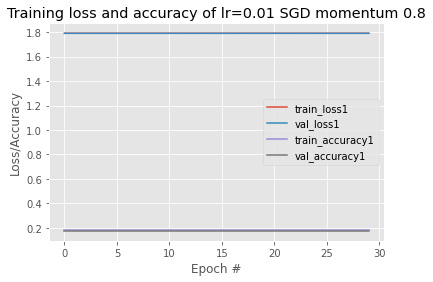

<Figure size 432x288 with 0 Axes>

In [25]:

import matplotlib.pyplot as plt
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()

plt.plot(N, H1.history['loss'], label='train_loss1')
plt.plot(N, H1.history['val_loss'], label='val_loss1')
plt.plot(N, H1.history['accuracy'], label='train_accuracy1')
plt.plot(N, H1.history['val_accuracy'], label='val_accuracy1')


plt.title('Training loss and accuracy of lr=0.01 SGD momentum 0.8')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


In [15]:
#TRYING DIFFERENT PARAMETERS (lr=0.001 SGD batch_size=64 decay=1e-5)
import datetime
now = datetime.datetime.now
t = now()
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-5, momentum=.9)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])
H2 = model.fit(X_train, y_train, batch_size=64,
              epochs=30, 
              validation_data=(X_test, y_test))
print('Training time: %s' % (now() - t))
best_scoreH2 = max(H2.history['accuracy'])
best_valH2 = max(H2.history['val_accuracy'])

print(best_scoreH2)
print(best_valH2)

Epoch 1/30
220/220 [==============================] - 28s 94ms/step - loss: 1.7916 - accuracy: 0.1673 - val_loss: 1.7896 - val_accuracy: 0.1750
Epoch 2/30
220/220 [==============================] - 19s 87ms/step - loss: 1.7858 - accuracy: 0.1813 - val_loss: 1.7966 - val_accuracy: 0.1850
Epoch 3/30
220/220 [==============================] - 19s 86ms/step - loss: 1.5412 - accuracy: 0.3659 - val_loss: 1.1857 - val_accuracy: 0.5057
Epoch 4/30
220/220 [==============================] - 19s 87ms/step - loss: 1.1945 - accuracy: 0.5039 - val_loss: 1.0426 - val_accuracy: 0.5873
Epoch 5/30
220/220 [==============================] - 19s 86ms/step - loss: 1.0286 - accuracy: 0.5824 - val_loss: 0.9770 - val_accuracy: 0.6007
Epoch 6/30
220/220 [==============================] - 19s 87ms/step - loss: 0.9489 - accuracy: 0.6221 - val_loss: 0.8933 - val_accuracy: 0.6357
Epoch 7/30
220/220 [==============================] - 19s 87ms/step - loss: 0.8785 - accuracy: 0.6587 - val_loss: 0.8416 - val_accuracy:

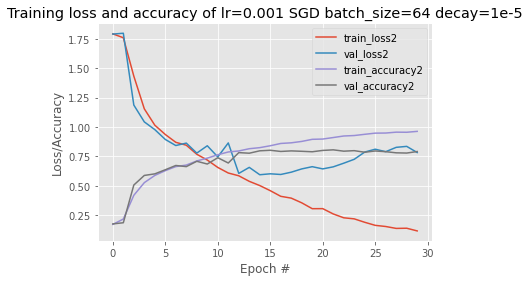

<Figure size 432x288 with 0 Axes>

In [16]:

import matplotlib.pyplot as plt
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()

plt.plot(N, H2.history['loss'], label='train_loss2')
plt.plot(N, H2.history['val_loss'], label='val_loss2')
plt.plot(N, H2.history['accuracy'], label='train_accuracy2')
plt.plot(N, H2.history['val_accuracy'], label='val_accuracy2')


plt.title('Training loss and accuracy of lr=0.001 SGD batch_size=64 decay=1e-5')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

plt.savefig("self_made_best_plot.png")

In [20]:
score = model.evaluate(X_pred, y_pred, batch_size=64)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

115/115 [==============================] - 3s 26ms/step - loss: 0.8094 - accuracy: 0.7867
Test Loss =  0.8093531131744385
Test Accuracy =  0.7867415547370911


In [22]:
# save the model's trained weights
model.save_weights('self_made_model_trained_wts.h5')

In [23]:
'''CONFUSION MATRIX'''
import pandas as pd
# Making prediction
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

predY_classes = y_test.argmax(1)
confusion_matrix = pd.crosstab(y_true, predY_classes,margins=True)
print("Confusion matrix:\n%s" % confusion_matrix)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix:
col_0    0    1    2    3    4    5   All
row_0                                    
0      437    0    0    0    0    0   437
1        0  474    0    0    0    0   474
2        0    0  553    0    0    0   553
3        0    0    0  525    0    0   525
4        0    0    0    0  510    0   510
5        0    0    0    0    0  501   501
All    437  474  553  525  510  501  3000


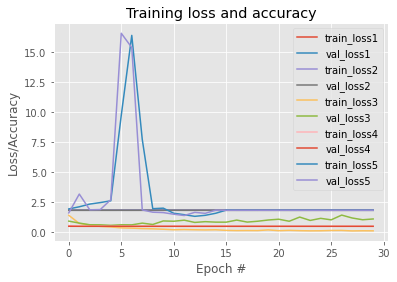

<Figure size 432x288 with 0 Axes>

In [34]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()

plt.plot(N, H1.history['loss'], label='train_loss1')
plt.plot(N, H1.history['val_loss'], label='val_loss1')
# plt.plot(N, H1.history['accuracy'], label='train_accuracy')
# plt.plot(N, H1.history['val_accuracy'], label='val_accuracy')

plt.plot(N, H2.history['loss'], label='train_loss2')
plt.plot(N, H2.history['val_loss'], label='val_loss2')
# plt.plot(N, H2.history['accuracy'], label='train_accuracy')
# plt.plot(N, H2.history['val_accuracy'], label='val_accuracy')

plt.plot(N, H3.history['loss'], label='train_loss3')
plt.plot(N, H3.history['val_loss'], label='val_loss3')
# plt.plot(N, H3.history['accuracy'], label='train_accuracy')
# plt.plot(N, H3.history['val_accuracy'], label='val_accuracy')


plt.plot(N, H4.history['loss'], label='train_loss4')
plt.plot(N, H4.history['val_loss'], label='val_loss4')
# plt.plot(N, H4.history['accuracy'], label='train_accuracy')
# plt.plot(N, H4.history['val_accuracy'], label='val_accuracy')


plt.plot(N, H5.history['loss'], label='train_loss5')
plt.plot(N, H5.history['val_loss'], label='val_loss5')
# plt.plot(N, H5.history['accuracy'], label='train_accuracy')
# plt.plot(N, H5.history['val_accuracy'], label='val_accuracy')

plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()
plt.savefig("self_made_all.png")